In [2]:
%matplotlib inline 
from __future__ import print_function

# EDA
The goal of this EDA is to extract a datasource required to fit the classifier in the application. Also, different classifying methods will be described. In this chapter the output and taken steps will be cutted to absolute minimum, as the full EDA output could easily take tens of pages.

## Load and describe the dataset

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def try_to_numerify(x):
    try:
        return int(x)
    except:
        try:
            return float(x)
        except:
            return x

def loader(filename,separator='\t',nan='-1'):
    with open(filename,'r') as f:
        rows = [x for x in f.read().split('\n') if x]
    rows = [x.split(separator) for x in rows]
    colnames = rows[0]
    data = rows[1:]
    data = [[try_to_numerify(x) for x in row] for row in data]
    return pd.DataFrame(data,columns=colnames)

df = loader("src/static/qviz.tsv")
np.round(df.describe().transpose(),2)

,count,mean,std,min,25%,50%,75%,max
implementation,8855.0,1.76,0.43,1.0,2.0,2.0,2.0,2.000000e+00
R1,8855.0,2.42,1.30,-1.0,1.0,2.0,3.0,5.000000e+00
R2,8855.0,2.16,1.24,-1.0,1.0,2.0,3.0,5.000000e+00
R3,8855.0,1.77,1.17,-1.0,1.0,1.0,2.0,5.000000e+00
R4,8855.0,2.26,1.33,-1.0,1.0,2.0,3.0,5.000000e+00
R5,8855.0,1.66,1.06,-1.0,1.0,1.0,2.0,5.000000e+00
R6,8855.0,2.32,1.32,-1.0,1.0,2.0,3.0,5.000000e+00
R7,8855.0,1.90,1.14,-1.0,1.0,2.0,3.0,5.000000e+00
R8,8855.0,1.96,1.18,-1.0,1.0,2.0,3.0,5.000000e+00
I1,8855.0,3.43,1.31,-1.0,3.0,4.0,4.0,5.000000e+00


There are several problems with the dataset:
* accuracy and elapse have exceptionally high deviation
* implementation column is pointless for the research 
* gender and age have very low mean(while for gender it shouldn't be calculated, it means, there's a lot of -1 values, which indicated lack of answer)
* each question has at least one empty answer (marked as -1)

## Cleansing and division
The purpose of this action is to remove malformed entries. However, requiring empty 'age' and 'gender' columns (-1) would severely reduce amount of samples. For this reason, several datasets will be extracted, and each will serve as a basis for further investigation. At the very end, the conclusion will be drawn to create a final dataset.

Datasets created:
* one with aggregated RIASEC measures and countries
* one containing the data with age and gender and disaggregated answers

### Geographic distribution dataset

For creating the training set, samples with possible similarity to Polish population would be desired. As the test was conducted on the Internet, many nations are included, however some may prevail. This research aims to cast light to that issue.

In [4]:
#filter the malformed entries from each dataset
riasec = df.drop(["age","gender","fromsearch","accuracy","elapse","implementation"],1)
for val in [x+str(y) for y in range(1,9) for x in 'RIASEC']:
    riasec = riasec.query("{0}>0 and {0}<6".format(val))

#construct the dataset
riasec['R'] = (riasec.R1 + riasec.R2 + riasec.R3 + riasec.R4 + riasec.R5 + riasec.R6 + riasec.R7 + riasec.R8)
riasec['I'] = (riasec.I1 + riasec.I2 + riasec.I3 + riasec.I4 + riasec.I5 + riasec.I6 + riasec.I7 + riasec.I8)
riasec['A'] = (riasec.A1 + riasec.A2 + riasec.A3 + riasec.A4 + riasec.A5 + riasec.A6 + riasec.A7 + riasec.A8)
riasec['S'] = (riasec.S1 + riasec.S2 + riasec.S3 + riasec.S4 + riasec.S5 + riasec.S6 + riasec.S7 + riasec.S8)
riasec['E'] = (riasec.E1 + riasec.E2 + riasec.E3 + riasec.E4 + riasec.E5 + riasec.E6 + riasec.E7 + riasec.E8)
riasec['C'] = (riasec.C1 + riasec.C2 + riasec.C3 + riasec.C4 + riasec.C5 + riasec.C6 + riasec.C7 + riasec.C8)
riasec = riasec.select(lambda x: x in ['R','I','A','S','E','C','country'],1)
np.round(riasec.describe(),2)

,R,I,A,S,E,C
count,7543.00,7543.00,7543.00,7543.00,7543.00,7543.00
mean,16.70,24.30,23.89,24.79,19.58,18.53
std,6.95,8.09,7.86,7.33,6.68,7.52
min,8.00,8.00,8.00,8.00,8.00,8.00
25%,11.00,18.00,18.00,20.00,15.00,12.00
50%,16.00,25.00,24.00,25.00,19.00,18.00
75%,21.00,31.00,30.00,30.00,24.00,24.00
max,40.00,40.00,40.00,40.00,40.00,40.00


Let's group those records per country to see, what is the geographical distribution of respondents. Also, classifying those countries may be useful.

In [5]:
newriasec = riasec.groupby(by='country').describe().select(lambda x:x[1] in ['mean','count'])
newriasec.index.names=[u'country',u'statistic']
newriasec = newriasec.reset_index('statistic').pivot(columns='statistic'
                                                    ).sort_values([('A','count')],ascending=False)
newriasec[u'Strength'] = newriasec.xs('mean',axis=1,level='statistic').idxmax(axis=1)
np.round(newriasec.head(50),2)

A              C              E              I              R  \
statistic   count   mean   count   mean   count   mean   count   mean   count   
country                                                                         
US         4601.0  23.52  4601.0  18.40  4601.0  19.12  4601.0  24.26  4601.0   
CA          524.0  23.64   524.0  18.99   524.0  19.42   524.0  24.06   524.0   
GB          416.0  24.23   416.0  17.22   416.0  18.77   416.0  24.74   416.0   
AU          287.0  23.59   287.0  18.76   287.0  19.66   287.0  25.00   287.0   
MY          234.0  24.46   234.0  20.89   234.0  22.49   234.0  23.25   234.0   
SG          107.0  23.39   107.0  19.21   107.0  22.84   107.0  23.39   107.0   
IN           94.0  26.57    94.0  20.01    94.0  22.53    94.0  25.43    94.0   
NZ           86.0  24.73    86.0  19.52    86.0  19.31    86.0  24.79    86.0   
NL           65.0  26.25    65.0  15.29    65.0  19.82    65.0  24.37    65.0   
DE           64.0  25.09    64.0  17.73    64.0  18.88    64.0  25.41    64.0   
HK           62.0  25.98    62.0  19.65    62.0  23.48    62.0  24.02    62.0   
IE           51.0  23.71    51.0  20.22    51.0  22.02    51.0  22.82    51.0   
PH           44.0  25.80    44.0  21.55    44.0  23.75    44.0  24.07    44.0   
ZA           40.0  24.20    40.0  15.98    40.0  17.75    40.0  25.92    40.0   
FR           34.0  27.21    34.0  18.18    34.0  20.15    34.0  25.74    34.0   
IT           34.0  27.35    34.0  18.09    34.0  21.50    34.0  26.06    34.0   
OM           33.0  22.55    33.0  23.30    33.0  24.94    33.0  22.27    33.0   
ES           31.0  26.52    31.0  17.71    31.0  19.55    31.0  26.84    31.0   
ID           31.0  29.87    31.0  23.45    31.0  24.39    31.0  25.19    31.0   
SE           31.0  21.42    31.0  18.29    31.0  17.94    31.0  22.35    31.0   
CH           29.0  26.52    29.0  18.83    29.0  19.52    29.0  24.17    29.0   
RO           27.0  24.85    27.0  18.30    27.0  20.41    27.0  23.56    27.0   
SI           27.0  21.96    27.0  20.33    27.0  20.11    27.0  26.70    27.0   
BE           26.0  26.69    26.0  14.65    26.0  18.73    26.0  24.38    26.0   
BR           22.0  25.59    22.0  14.68    22.0  17.05    22.0  25.41    22.0   
CN           21.0  26.10    21.0  14.86    21.0  21.90    21.0  23.67    21.0   
PL           21.0  24.10    21.0  22.10    21.0  21.38    21.0  26.00    21.0   
GR           20.0  25.10    20.0  18.15    20.0  20.05    20.0  25.00    20.0   
FI           19.0  20.84    19.0  19.26    19.0  17.79    19.0  26.11    19.0   
TH           19.0  23.37    19.0  23.16    19.0  25.21    19.0  19.89    19.0   
TR           19.0  29.11    19.0  17.58    19.0  22.26    19.0  29.05    19.0   
NO           16.0  23.25    16.0  17.44    16.0  18.25    16.0  26.50    16.0   
CZ           16.0  28.19    16.0  18.75    16.0  21.94    16.0  23.56    16.0   
EG           16.0  24.06    16.0  19.12    16.0  23.38    16.0  22.44    16.0   
MX           15.0  25.67    15.0  20.53    15.0  21.60    15.0  26.67    15.0   
KR           15.0  25.13    15.0  16.33    15.0  19.40    15.0  28.13    15.0   
JP           13.0  21.23    13.0  16.00    13.0  18.54    13.0  24.31    13.0   
PT           13.0  26.00    13.0  18.92    13.0  18.69    13.0  28.15    13.0   
DK           13.0  24.69    13.0  13.31    13.0  15.85    13.0  23.54    13.0   
AE           13.0  25.31    13.0  16.31    13.0  19.23    13.0  27.31    13.0   
IL           12.0  25.17    12.0  16.08    12.0  17.33    12.0  25.58    12.0   
HR           11.0  26.18    11.0  20.18    11.0  20.00    11.0  27.18    11.0   
LB           11.0  22.55    11.0  20.64    11.0  20.82    11.0  25.18    11.0   
AT           11.0  23.55    11.0  21.09    11.0  20.36    11.0  21.73    11.0   
SA           10.0  20.70    10.0  20.30    10.0  20.00    10.0  23.40    10.0   
JM           10.0  25.70    10.0  18.80    10.0  21.50    10.0  24.10    10.0   
PK            9.0  25.89     9.0  17.67     9.0

Let's take into account data from Europe only.

In [6]:
#TO ANALYZE: abbrevs of country names
euro = ['AL','AD','AM','AT','BY','BE','BA','BG','CH','CY','CZ','DE','DK','EE','ES','FO','FI','FR','GB','GE','GI','GR','HU','HR','IE','IS','IT','LT','LU','LV','MC','MK','MT','NO','NL','PO','PL','PT','RO','RU','SE','SI','SK','SM','TR','UA','VA']
dfeu = newriasec.loc[euro]
dfeu = dfeu[dfeu.notnull().any(axis=1)] #filtering out NaNs (non-existent records)
dfeu.sort_values([('A','count')],ascending=False)

A                 C                 E                 I  \
statistic  count       mean  count       mean  count       mean  count   
country                                                                  
GB         416.0  24.230769  416.0  17.221154  416.0  18.766827  416.0   
NL          65.0  26.246154   65.0  15.292308   65.0  19.815385   65.0   
DE          64.0  25.093750   64.0  17.734375   64.0  18.875000   64.0   
IE          51.0  23.705882   51.0  20.215686   51.0  22.019608   51.0   
FR          34.0  27.205882   34.0  18.176471   34.0  20.147059   34.0   
IT          34.0  27.352941   34.0  18.088235   34.0  21.500000   34.0   
SE          31.0  21.419355   31.0  18.290323   31.0  17.935484   31.0   
ES          31.0  26.516129   31.0  17.709677   31.0  19.548387   31.0   
CH          29.0  26.517241   29.0  18.827586   29.0  19.517241   29.0   
SI          27.0  21.962963   27.0  20.333333   27.0  20.111111   27.0   
RO          27.0  24.851852   27.0  18.296296   27.0  20.407407   27.0   
BE          26.0  26.692308   26.0  14.653846   26.0  18.730769   26.0   
PL          21.0  24.095238   21.0  22.095238   21.0  21.380952   21.0   
GR          20.0  25.100000   20.0  18.150000   20.0  20.050000   20.0   
FI          19.0  20.842105   19.0  19.263158   19.0  17.789474   19.0   
TR          19.0  29.105263   19.0  17.578947   19.0  22.263158   19.0   
CZ          16.0  28.187500   16.0  18.750000   16.0  21.937500   16.0   
NO          16.0  23.250000   16.0  17.437500   16.0  18.250000   16.0   
PT          13.0  26.000000   13.0  18.923077   13.0  18.692308   13.0   
DK          13.0  24.692308   13.0  13.307692   13.0  15.846154   13.0   
HR          11.0  26.181818   11.0  20.181818   11.0  20.000000   11.0   
AT          11.0  23.545455   11.0  21.090909   11.0  20.363636   11.0   
BG           8.0  27.750000    8.0  17.125000    8.0  19.500000    8.0   
RU           7.0  22.571429    7.0  19.285714    7.0  23.000000    7.0   
SK           7.0  26.857143    7.0  19.000000    7.0  18.857143    7.0   
AL           6.0  22.833333    6.0  20.166667    6.0  20.333333    6.0   
HU           6.0  22.333333    6.0  21.000000    6.0  19.166667    6.0   
LT           5.0  25.800000    5.0  12.600000    5.0  20.000000    5.0   
EE           5.0  23.600000    5.0  22.200000    5.0  18.200000    5.0   
CY           5.0  21.400000    5.0  18.600000    5.0  20.200000    5.0   
MT           4.0  24.750000    4.0  10.750000    4.0  13.500000    4.0   
LU           3.0  21.333333    3.0  20.000000    3.0  19.000000    3.0   
BA           3.0  32.000000    3.0  19.666667    3.0  17.666667    3.0   
UA           3.0  17.666667    3.0  22.666667    3.0  20.333333    3.0   
LV           2.0  27.000000    2.0  16.500000    2.0  26.500000    2.0   
IS           2.0  25.000000    2.0  15.500000    2.0  11.500000    2.0   
BY           2.0  25.500000    2.0  16.500000    2.0  19.500000    2.0   
MK           1.0  32.000000    1.0  25.000000    1.0  22.000000    1.0   

                          R                 S            Strength  
statistic       mean  count       mean  count       mean           
country                                                            
GB         24.737981  416.0  16.322115  416.0  23.250000        I  
NL         24.369231   65.0  14.800000   65.0  25.815385        A  
DE         25.406250   64.0  16.343750   64.0  24.750000        I  
IE         22.823529   51.0  16.862745   51.0  25.980392        S  
FR         25.735294   34.0  16.617647   34.0  24.176471        A  
IT         26.058824   34.0  16.735294   34.0  24.264706        A  
SE         22.354839   31.0  16.903226   31.0  19.516129        I  
ES         26.838710   31.0  15.354839   31.0  26.096774        I  
CH         24.172414   29.0  17.241379   29.0  23.413793        A  
SI         26.703704   27.0  20.296296   27.0  21.592593        I  
RO         23.555556   27.0  16.074074   27.0  22.888889        A  
BE         24.384615   26.0 

Unfortunately, Polish respondent contribute to a statistically insignificant sample (sample size less than 30), which would not describe the population well. Moreover, samples of this order would produce inaccurate classifications. To tackle this, a dataset with countries similar to Poland may be created. Fortunately, Investigative is a common choice among european respondents. With the next dataset, we will delve into age and gender profiles of countries.

### Age and gender dataset

First step into analysing age and gender relations within the group is to remove entries with garbled values. Since the amount of records without disclosed age is high, we will use both data with and without disclosed information, hence creating four datasets: for each combination of presence and absence of gender or age data. Age histogram will be plotted.

In [7]:
with_age = df.query('age > -1 and age < 100 and not (gender > 0 and gender < 3)')
with_gender = df.query('gender > 0 and gender < 3 and not (age > -1 and age < 100)')
with_age_and_gender = df.query('age > -1 and age < 100 and gender > 0 and gender < 3')
unspecified = df.query('not (age > -1 and age < 100) and not (gender > 0 and gender < 3)')
map(len,(with_age,with_gender,with_age_and_gender,unspecified))

[18, 15, 2093, 6729]

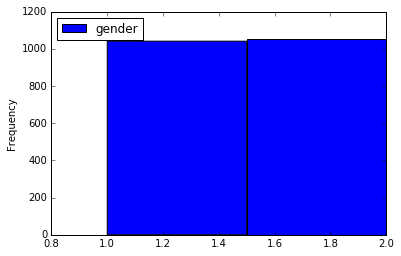

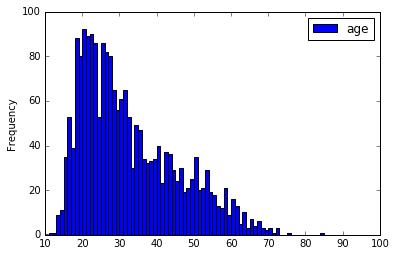

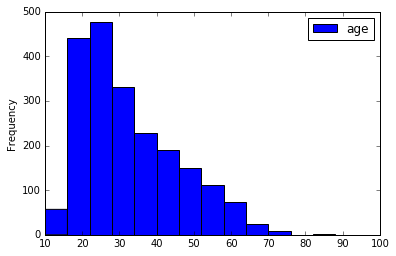

In [8]:
import matplotlib.pyplot as plt

plt.figure()
with_age_and_gender.select(lambda x:x in ['gender'],axis=1).plot(kind='hist',range=[1.0, 2.0],bins=2)
with_age_and_gender.select(lambda x:x in ['age'],axis=1).plot(kind='hist',bins=range(10,100))
with_age_and_gender.select(lambda x:x in ['age'],axis=1).plot(kind='hist',bins=range(10,100,6))


plt.show()

For set with genders, we will group the dataset by them. For age, categories will be created, for range (10-100) for each 6 years. For each of those groups, we will create a spider plot to represent their profiles. Radar charts are not accessible by themselves, hence custom code has to be used. The code in the cell below is an example from matplotlib API and is used as is. Source: "http://matplotlib.org/examples/api/radar_chart.html"

In [10]:
"""
======================================
Radar chart (aka spider or star chart)
======================================

This example creates a radar chart, also known as a spider or star chart [1]_.

Although this example allows a frame of either 'circle' or 'polygon', polygon
frames don't have proper gridlines (the lines are circles instead of polygons).
It's possible to get a polygon grid by setting GRIDLINE_INTERPOLATION_STEPS in
matplotlib.axis to the desired number of vertices, but the orientation of the
polygon is not aligned with the radial axes.

.. [1] http://en.wikipedia.org/wiki/Radar_chart
"""
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    # rotate theta such that the first axis is at the top
    theta += np.pi/2

    def draw_poly_patch(self):
        verts = unit_poly_verts(theta)
        return plt.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        # unit circle centered on (0.5, 0.5)
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict:
        raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        # define draw_frame method
        draw_patch = patch_dict[frame]

        def fill(self, *args, **kwargs):
            """Override fill so that line is closed by default"""
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)
            # The following is a hack to get the spines (i.e. the axes frame)
            # to draw correctly for a polygon frame.

            # spine_type must be 'left', 'right', 'top', 'bottom', or `circle`.
            spine_type = 'circle'
            verts = unit_poly_verts(theta)
            # close off polygon by repeating first vertex
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta

def unit_poly_verts(theta):
    """Return vertices of polygon for subplot axes.

    This polygon is circumscribed by a unit circle centered at (0.5, 0.5)
    """
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts

In the cell below, a code for gneration of the data source is provided. Moreover, a example usage of the API above is listed (REMOVE IT LATER WHEN YOU'RE DONE)

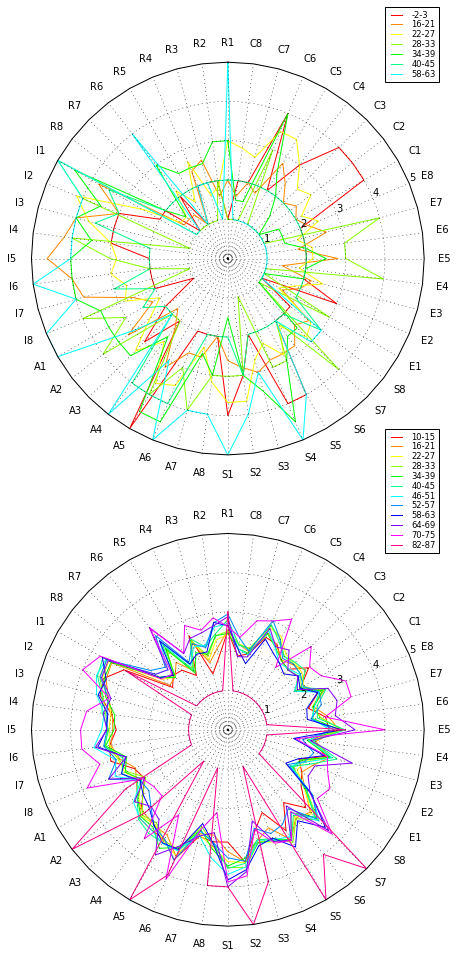

In [12]:
from math import pi

theta = radar_factory(48, frame='polygon')
fig, axes = plt.subplots(figsize=(15,15), nrows=2, ncols=1,
                         subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)
colors = ['#ff0000','#ff8800','#ffff00','#88ff00','#00ff00','#00ff88',
         '#00ffff','#0088ff','#0000ff','#8800ff','#ff00ff','#ff0088']

for dataset, ax in zip([with_age,with_age_and_gender],axes.flatten()):
    plottable = dataset.select(lambda x: x in ([x+str(y) for x in 'RIASEC' for y in range(1,9) ]+['age']),axis=1)
    plottable['age']=plottable['age'].map(lambda x:int((x-10)/6))
    plottable = plottable.groupby(by='age').mean()
    spoke_labels = [x for x in plottable.transpose().index] #?? - for sure?

    for idx,color in zip([x for x in plottable.index],colors):
        case_data = plottable.select(lambda x: x in [idx]).as_matrix()[0]
        ax.plot(theta,case_data, color=color)
        ax.set_varlabels(spoke_labels)
    # add legend relative to top-left plot
    labels = ["{}-{}".format(6*x+10,6*x+15) for x in plottable.index]
    legend = ax.legend(labels, loc=(0.9, .95),
                       labelspacing=0.1, fontsize='small')

plt.show()

Gender and age profile of respondents from Poland and Europe:

In [13]:
df.query('country == \'PL\'')

,implementation,R1,R2,R3,R4,R5,R6,R7,R8,I1,...,C5,C6,C7,C8,accuracy,elapse,country,fromsearch,gender,age
532,2,4,1,3,4,2,2,3,1,4,...,3,3,3,2,85,194,PL,1,-1,-1
610,2,4,3,3,3,2,4,3,3,3,...,5,4,2,3,50,2687,PL,0,-1,-1
667,2,2,1,1,1,1,1,1,1,3,...,3,1,2,3,100,376,PL,0,-1,-1
1519,2,4,3,3,5,3,3,4,3,5,...,3,3,1,1,80,130,PL,1,-1,-1
3704,2,4,1,2,3,2,3,3,2,5,...,5,5,3,4,100,260,PL,0,-1,-1
4152,2,4,3,4,4,1,4,1,3,5,...,3,3,2,2,80,161,PL,0,-1,-1
4184,2,2,2,3,3,2,3,3,4,2,...,5,4,5,5,100,417,PL,0,-1,-1
4666,2,1,1,1,1,1,1,1,1,2,...,2,2,2,1,96,537,PL,0,-1,-1
4730,2,1,1,1,1,1,1,1,1,5,...,4,4,1,1,90,251,PL,1,-1,-1
5696,2,1,1,1,1,1,1,1,1,2,...,3,3,3,3,95,1113,PL,1,-1,-1


Sex and age information for Polish responders are limited, therefore we cannot build datasets that are similar to Polish in this case. As a rule of thumb, we can select datasets, that have balanced gender quotas.

## Preparing data for modeling

Choice of datasets:
* random sample
* european with the same preference as Poland
* european with roughly equal gender distribution
* random sample with feature selection
* ranks rearranged with the clustering algorithm

In [14]:
from copy import deepcopy

def classify(x):
    x = deepcopy(x)
    x['R'] = (x.R1 + x.R2 + x.R3 + x.R4 + x.R5 + x.R6 + x.R7 + x.R8)
    x['I'] = (x.I1 + x.I2 + x.I3 + x.I4 + x.I5 + x.I6 + x.I7 + x.I8)
    x['A'] = (x.A1 + x.A2 + x.A3 + x.A4 + x.A5 + x.A6 + x.A7 + x.A8)
    x['S'] = (x.S1 + x.S2 + x.S3 + x.S4 + x.S5 + x.S6 + x.S7 + x.S8)
    x['E'] = (x.E1 + x.E2 + x.E3 + x.E4 + x.E5 + x.E6 + x.E7 + x.E8)
    x['C'] = (x.C1 + x.C2 + x.C3 + x.C4 + x.C5 + x.C6 + x.C7 + x.C8)
    x['Strength'] = x.select(lambda x: x in "RIASEC",axis=1).idxmax(axis=1)
    return x.select(lambda x: x not in 'RIASEC',axis=1)

dc = classify(df)

#Random sample
import numpy.random
randlist = numpy.random.randint(dc.count()[0]-1,size=1000)
random_sample = dc.select(lambda x: x in randlist)

#same_preference
indices = dfeu[dfeu['Strength',""]=="I"].index.tolist()
same_preference = dc.query('country in @indices')

#equal_genders
dgend = deepcopy(dc)
dgend['male']=dgend.gender.apply(lambda x:1 if x==2 else 0)
dgend['female']=dgend.gender.apply(lambda x:1 if x==1 else 0)
dgend = dgend.groupby(by='country').sum().query('0.75 < male/female < 1.2')
indices=dgend.index.tolist()
equal_genders = dc.query('country in @indices')

Feature selection can be performed by picking questions with higher variance, however for ordered data the variance may not be used freely. Another approach is to use autocorrelation of the dataset to determine the redundant questions. Note that for those items non-linear correlation coefficients are applicable (Spearman?)

In [15]:
stdf = df.select(lambda x:x in [x+str(y) for x in "RIASEC" for y in range(1,9)],axis=1).std()
top_features = stdf.sort_values(ascending=False)[:30].index.tolist()
dg = deepcopy(dc)
picked_features = dg.select(lambda x:x in (top_features+['Strength']),axis=1)
print("Top features: "+", ".join(top_features))

Top features: A5, A7, A4, A6, A3, A2, A8, I8, I3, I5, I4, I6, S6, A1, S3, S5, E5, I7, S4, C5, S7, S1, E8, I2, R4, R6, E3, I1, S8, R1


In [16]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=6).fit(df.select(lambda x:x in [x+str(y) for x in "RIASEC" for y in range(1,9)],axis=1))
clustered = df.select(lambda x:x in [x+str(y) for x in "RIASEC" for y in range(1,9)],axis=1)
clustered['Strength'] = clf.predict(clustered)
clustered

,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,...,E8,C1,C2,C3,C4,C5,C6,C7,C8,Strength
0,3,1,4,2,1,2,1,1,5,4,...,4,1,1,1,1,2,1,1,2,1
1,1,1,1,1,1,1,1,1,4,4,...,1,1,1,1,1,1,1,1,1,4
2,3,2,1,1,1,1,2,1,5,2,...,2,4,3,2,3,3,4,4,4,0
3,3,2,1,2,2,3,1,2,5,4,...,2,2,4,3,2,1,3,2,1,1
4,-1,2,3,2,3,2,1,3,5,2,...,2,3,4,4,2,4,3,3,3,3
5,3,1,3,4,3,4,3,3,3,4,...,4,3,4,3,3,3,3,3,3,3
6,1,1,1,1,1,1,1,1,2,3,...,5,1,1,1,1,1,1,1,1,5
7,1,1,1,1,1,1,1,1,1,2,...,5,1,1,1,1,1,1,1,1,5
8,4,4,3,4,3,4,3,4,2,2,...,3,1,2,1,1,2,2,2,1,5
9,5,5,1,4,2,5,5,4,5,5,...,3,1,2,1,1,1,3,1,1,3


*Sum up creation*

Sanity checks for datasets:

In [17]:
def sanity(x):
    x=deepcopy(x)
    x['R'] = (x.R1 + x.R2 + x.R3 + x.R4 + x.R5 + x.R6 + x.R7 + x.R8)
    x['I'] = (x.I1 + x.I2 + x.I3 + x.I4 + x.I5 + x.I6 + x.I7 + x.I8)
    x['A'] = (x.A1 + x.A2 + x.A3 + x.A4 + x.A5 + x.A6 + x.A7 + x.A8)
    x['S'] = (x.S1 + x.S2 + x.S3 + x.S4 + x.S5 + x.S6 + x.S7 + x.S8)
    x['E'] = (x.E1 + x.E2 + x.E3 + x.E4 + x.E5 + x.E6 + x.E7 + x.E8)
    x['C'] = (x.C1 + x.C2 + x.C3 + x.C4 + x.C5 + x.C6 + x.C7 + x.C8)
    print(x.select(lambda x: x in ['R','I','A','S','E','C'],1).corr(method='spearman'))

sanity(random_sample)
sanity(same_preference)
sanity(equal_genders)

print(map(lambda x:x.count().select(lambda x:x=='R1'),[random_sample,same_preference,equal_genders,clustered]))

map(lambda x:x[1].to_csv("{}.csv".format(x[0])),enumerate([random_sample,same_preference,equal_genders,clustered,picked_features]))

          R         I         A         S         E         C
R  1.000000  0.351583  0.116827  0.053365  0.222281  0.460326
I  0.351583  1.000000  0.293377  0.173280  0.075742  0.142551
A  0.116827  0.293377  1.000000  0.298863  0.225001 -0.062294
S  0.053365  0.173280  0.298863  1.000000  0.420071  0.170134
E  0.222281  0.075742  0.225001  0.420071  1.000000  0.499153
C  0.460326  0.142551 -0.062294  0.170134  0.499153  1.000000
          R         I         A         S         E         C
R  1.000000  0.392197  0.093335  0.080263  0.215052  0.476342
I  0.392197  1.000000  0.341903  0.204322  0.031996  0.130974
A  0.093335  0.341903  1.000000  0.367359  0.196295 -0.096838
S  0.080263  0.204322  0.367359  1.000000  0.347138  0.062591
E  0.215052  0.031996  0.196295  0.347138  1.000000  0.428114
C  0.476342  0.130974 -0.096838  0.062591  0.428114  1.000000
          R         I         A         S         E         C
R  1.000000  0.330095  0.114161  0.022075  0.244910  0.447003
I  0.330

[None, None, None, None, None]

As it can be seen, pairs R-S, I-E and A-C have the lowest correlations, which is in line with assumptions of the RIASEC model. In each dataset, artistic and conventional approaches have negative correlation, which suggest the starkest opposition of those archetypes. Moreover similarities between neighbouring types are exhibited, with the strongest link between realistic and conventional types.

Datasets have varying length and have to be normalized. For each, a fixed amount of samples will be used for training and cross-validating the model.

## Conclusions

We've created datasets for the classifier. Moreover, we reduced the amount of questions, creating more dense dataset. In later stages of the paper we will assess performances of different classifying techniques.